In [12]:
import sys

sys.path.append("../utils")
sys.path.append("../models/preprocessing")
from dcase2025_dataset import DCASE2025Dataset
from mel_features import LogMelSpectrogram

In [44]:
mel_extractor = LogMelSpectrogram()

df_train = DCASE2025Dataset.load("train.pt")#.filter_by_device(["a", "b", "c"])
w_train = df_train.waves
m_train = mel_extractor(w_train, augment=True)

In [45]:
import matplotlib.pyplot as plt

def plot(mel):
    # Squeeze para quitar la dimensión de batch
    mel = mel.squeeze(0)

    plt.figure(figsize=(10, 4))
    plt.imshow(mel, origin='lower', aspect='auto', cmap='magma')
    plt.colorbar(label='dB')
    plt.xlabel('Tiempo')
    plt.ylabel('Filtros Mel')
    plt.title(f'Mel Spectrogram {tuple(mel.shape)}')
    plt.tight_layout()
    plt.show()

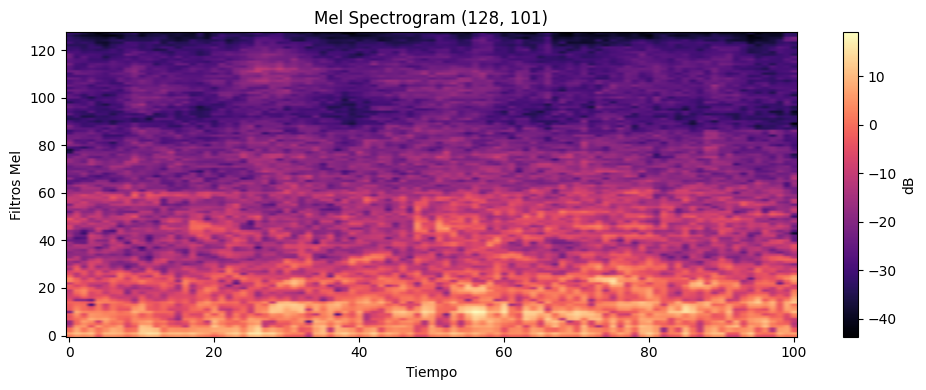

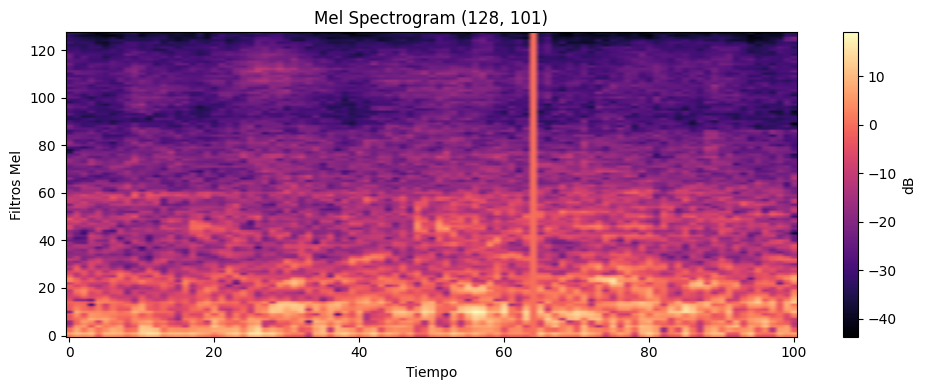

In [46]:
i = 150

plot(df_train.mels[i])
plot(m_train[i])

In [48]:
df_train_aug = DCASE2025Dataset.load("train.pt")
df_train_aug.mels = m_train
df_train_aug.save("train_aug.pt")